In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train_df = pd.read_csv(r"Dataset/SoftwareDefectDataset/train.csv", encoding="utf8")
test_df = pd.read_csv(r"Dataset/SoftwareDefectDataset/test.csv", encoding="utf8")
submission_df = pd.read_csv(r"Dataset/SoftwareDefectDataset/sample_submission.csv", encoding="utf8")
train_df.shape, test_df.shape

((101763, 23), (67842, 22))

In [7]:
train_df.describe()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,...,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,50881.000000,37.347160,5.492684,2.845022,3.498826,96.655995,538.280956,0.111634,13.681881,27.573007,...,1141.357982,22.802453,1.773945,3.979865,0.196604,11.896131,15.596671,57.628116,39.249698,9.839549
std,29376.592059,54.600401,7.900855,4.631262,5.534541,171.147191,1270.791601,0.100096,14.121306,22.856742,...,9862.795472,38.541010,5.902412,6.382358,0.998906,6.749549,18.064261,104.537660,71.692309,14.412769
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25440.500000,13.000000,2.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.600000,15.560000,...,31.380000,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000
50%,50881.000000,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.360000,...,125.400000,14.000000,0.000000,2.000000,0.000000,11.000000,12.000000,30.000000,20.000000,5.000000
75%,76321.500000,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.150000,18.000000,34.340000,...,565.920000,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,45.000000,11.000000
max,101762.000000,3442.000000,404.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,...,935923.390000,2824.000000,344.000000,219.000000,43.000000,410.000000,1026.000000,5420.000000,3021.000000,503.000000


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [10]:
test_df.describe()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,...,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000
mean,135683.500000,37.855945,5.559462,2.857699,3.535715,98.222178,548.422497,0.111521,13.762472,27.635377,...,1218.682009,23.131924,1.832493,4.020739,0.200834,11.909776,15.678370,58.325212,39.845258,9.985923
std,19584.442818,55.793918,8.237389,4.666370,5.339085,179.123492,1318.416828,0.100840,14.487425,23.420521,...,10739.081373,39.606659,6.229052,7.136069,1.044581,6.974254,17.979368,105.491447,72.756320,15.342975
min,101763.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,118723.250000,13.000000,2.000000,1.000000,1.000000,25.000000,96.210000,0.040000,5.500000,15.540000,...,31.270000,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000
50%,135683.500000,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.230000,...,126.490000,14.000000,0.000000,2.000000,0.000000,12.000000,12.000000,30.000000,20.000000,5.000000
75%,152643.750000,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.140000,18.000000,34.270000,...,561.802500,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,44.000000,11.000000
max,169604.000000,1891.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,...,935923.390000,1599.000000,344.000000,447.000000,42.000000,411.000000,1026.000000,3368.000000,2301.000000,826.000000


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67842 entries, 0 to 67841
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 67842 non-null  int64  
 1   loc                67842 non-null  float64
 2   v(g)               67842 non-null  float64
 3   ev(g)              67842 non-null  float64
 4   iv(g)              67842 non-null  float64
 5   n                  67842 non-null  float64
 6   v                  67842 non-null  float64
 7   l                  67842 non-null  float64
 8   d                  67842 non-null  float64
 9   i                  67842 non-null  float64
 10  e                  67842 non-null  float64
 11  b                  67842 non-null  float64
 12  t                  67842 non-null  float64
 13  lOCode             67842 non-null  int64  
 14  lOComment          67842 non-null  int64  
 15  lOBlank            67842 non-null  int64  
 16  locCodeAndComment  678

In [12]:
# Check missing values and duplicated values in train_df
print(train_df.isna().sum())
print(train_df.duplicated().sum())

id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64
0


In [13]:
# Check missing values and duplicated values in test_df
print(train_df.isna().sum())
print(train_df.duplicated().sum())

id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64
0


KeyError: 'defects'

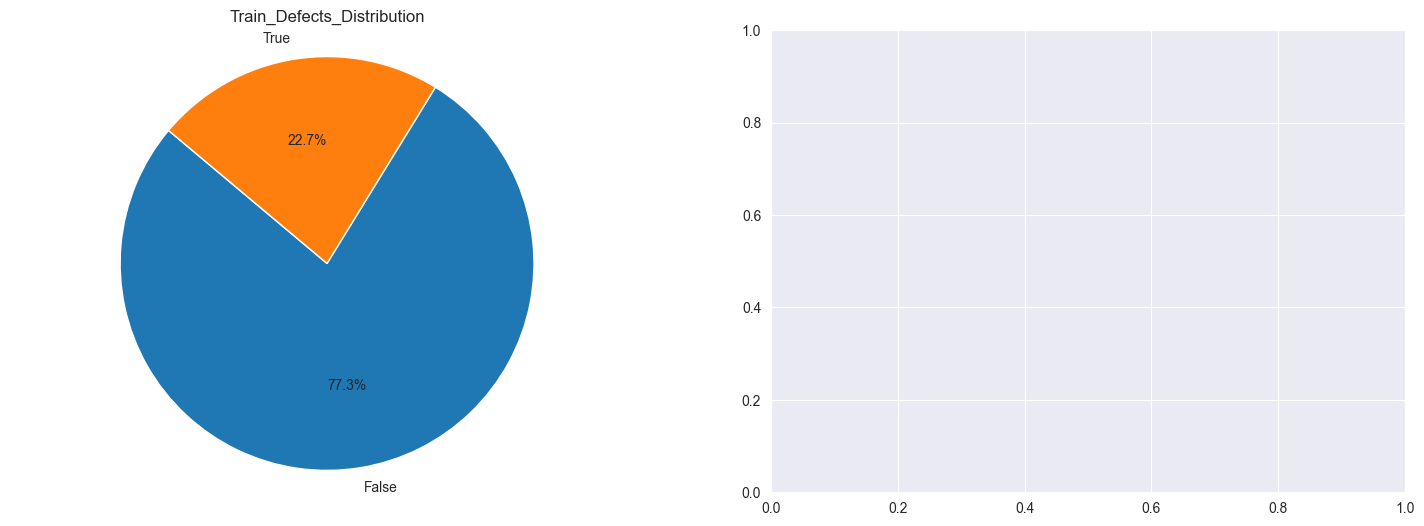

In [15]:
# EDA
# Check target distribution
# Data inbalance
def plot_pie_chart(data, title, ax):
    dataCounts = data['defects'].value_counts()
    # Category labels (features)
    labels = dataCounts.index
    sizes = dataCounts.values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    # Ensure the pie chart looks like a circle
    ax.axis('equal')
    ax.set_title(title)


# Create 2 subplots in a row
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
plot_pie_chart(train_df, 'Train_Defects_Distribution', axes[0])
plot_pie_chart(test_df, 'Test_Defects_Distribution', axes[1])
plt.tight_layout()
plt.show()

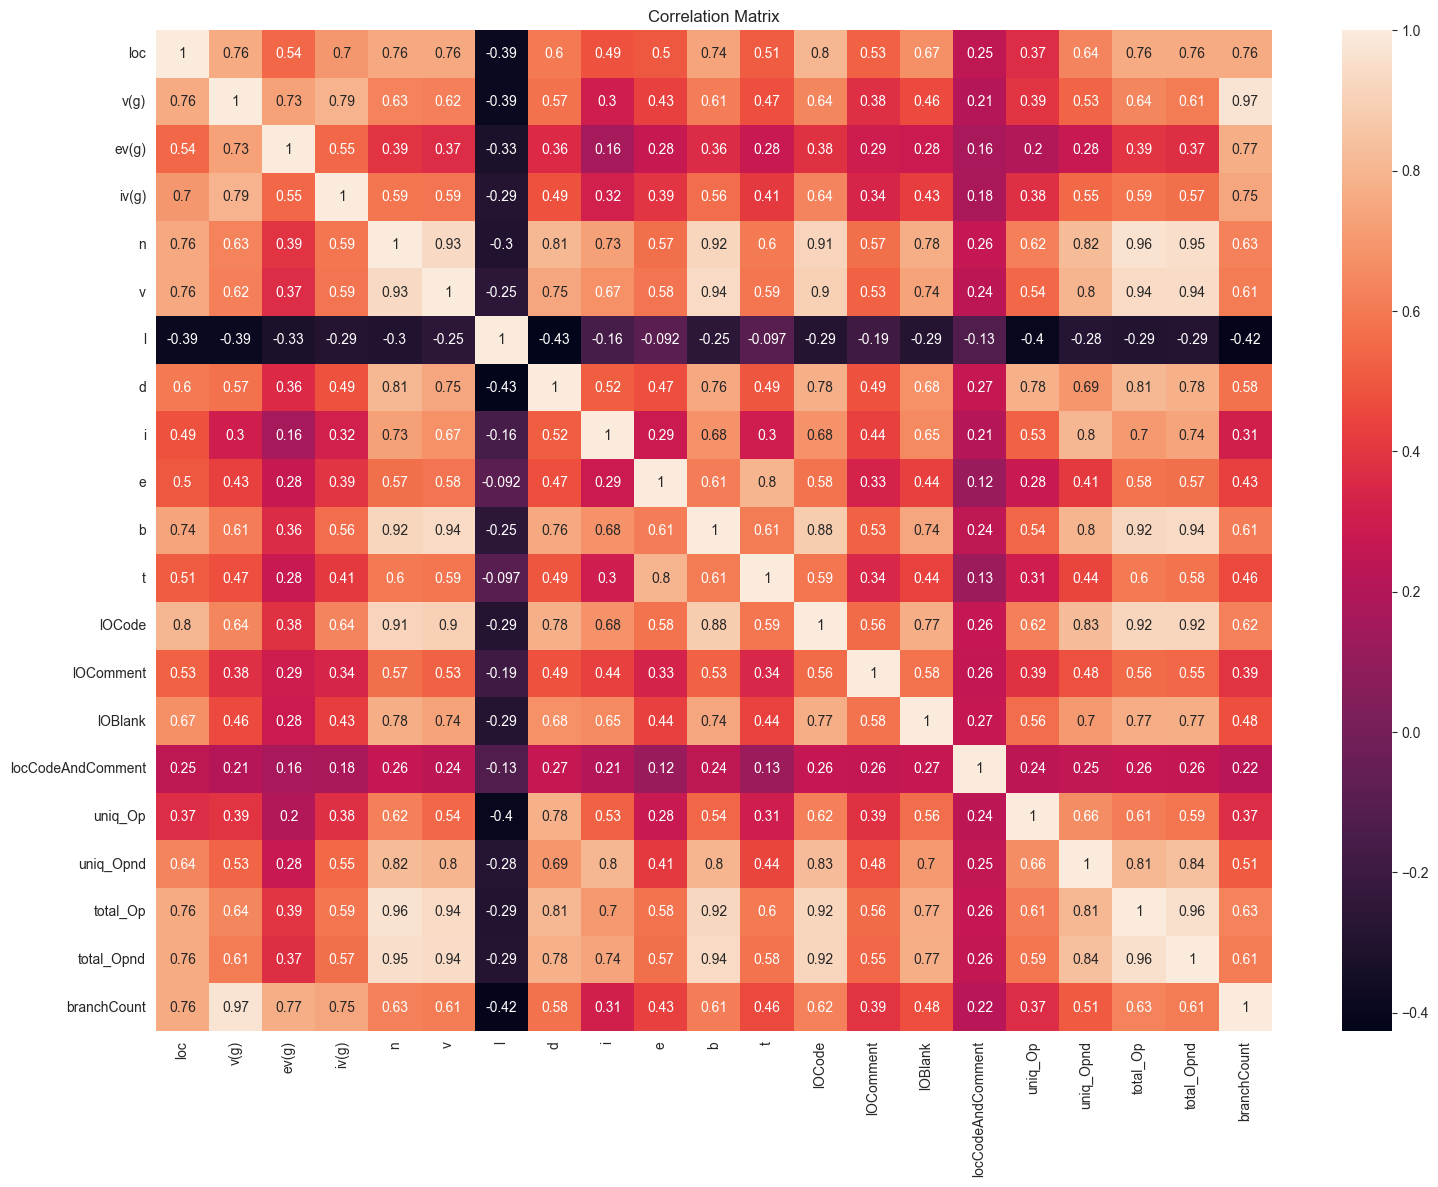

In [18]:
# Correlation Analysis
# 97% Correlation between branchCount and v(g)
# 96% Correlation between total_Op and n
# 96% Correlation between total_Opnd and total_Op
# l is the only feature that is negatively correlated with other features
corrMatrix = train_df.drop(columns = ['id', 'defects'], axis=1).corr()
plt.figure(figsize=(18, 13))
sns.heatmap(corrMatrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [20]:
# Select highly correlated features
correlation_threshold = 0.8
highly_correlated_features = set()

# Iterate through the upper triangle of the correlation matrix to avoid duplicates
for i in range(len(corrMatrix.columns)):
    for j in range(i):
        if abs(corrMatrix.iloc[i, j]) > correlation_threshold:
            feature_i = corrMatrix.columns[i]
            feature_j = corrMatrix.columns[j]
            highly_correlated_features.add(feature_i)
            highly_correlated_features.add(feature_j)
print(highly_correlated_features)
print(len(highly_correlated_features))

{'lOCode', 'uniq_Opnd', 'total_Op', 'v(g)', 'd', 'loc', 'total_Opnd', 'branchCount', 'n', 'i', 'b', 'v'}
12


In [22]:
X = train_df.drop(columns = ['id', 'defects'], axis = 1)
Y = train_df['defects'].map({False: 0, True: 1})

test_cv = test_df.drop(columns = ['id'], axis = 1)

In [24]:
# Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
# Training
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
# Validation
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [25]:
ens_cv_scores, ens_preds = list(), list()
#hill_ens_cv_scores, hill_ens_preds =  list(), list()

sk = RepeatedStratifiedKFold(n_splits = 25, n_repeats = 1, random_state = 42)
for i, (train_idx, test_idx) in enumerate(sk.split(X, Y)):

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]

    print('----------------------------------------------------------')

    ########
    ## RF ##
    ########

    RF_md = RandomForestClassifier(n_estimators = 500,
                                   max_depth = 7,
                                   min_samples_split = 15,
                                   min_samples_leaf = 10).fit(X_train, Y_train)

    RF_pred = RF_md.predict_proba(X_test)[:, 1]
    RF_score = roc_auc_score(Y_test, RF_pred)

    print('Fold', i, '==> RF oof ROC-AUC score is ==>', RF_score)

    RF_pred_test = RF_md.predict_proba(test_cv)[:, 1]

    #################
    ## Extra Trees ##
    #################

    ET_md = ExtraTreesClassifier(n_estimators = 500,
                                 max_depth = 7,
                                 min_samples_split = 15,
                                 min_samples_leaf = 10).fit(X_train, Y_train)

    ET_pred = ET_md.predict_proba(X_test)[:, 1]
    ET_score = roc_auc_score(Y_test, ET_pred)

    print('Fold', i, '==> ET oof ROC-AUC score is ==>', ET_score)

    ET_pred_test = ET_md.predict_proba(test_cv)[:, 1]

    ##########################
    ## HistGradientBoosting ##
    ##########################

    hist_md = HistGradientBoostingClassifier(l2_regularization = 0.01,
                                             early_stopping = False,
                                             learning_rate = 0.01,
                                             max_iter = 500,
                                             max_depth = 5,
                                             max_bins = 255,
                                             min_samples_leaf = 15,
                                             max_leaf_nodes = 10).fit(X_train, Y_train)

    hist_pred = hist_md.predict_proba(X_test)[:, 1]
    hist_score = roc_auc_score(Y_test, hist_pred)

    print('Fold', i, '==> Hist oof ROC-AUC score is ==>', hist_score)

    hist_pred_test = hist_md.predict_proba(test_cv)[:, 1]

    ##########
    ## LGBM ##
    ##########

    LGBM_md = LGBMClassifier(objective = 'binary',
                             n_estimators = 500,
                             max_depth = 7,
                             learning_rate = 0.01,
                             num_leaves = 20,
                             reg_alpha = 3,
                             reg_lambda = 3,
                             subsample = 0.7,
                             colsample_bytree = 0.7).fit(X_train, Y_train)

    lgb_pred = LGBM_md.predict_proba(X_test)[:, 1]
    lgb_score = roc_auc_score(Y_test, lgb_pred)

    print('Fold', i, '==> LGBM oof ROC-AUC score is ==>', lgb_score)

    lgb_pred_test = LGBM_md.predict_proba(test_cv)[:, 1]

    #########
    ## XGB ##
    #########

    XGB_md = XGBClassifier(objective = 'binary:logistic',
                           tree_method = 'hist',
                           colsample_bytree = 0.7,
                           gamma = 2,
                           learning_rate = 0.01,
                           max_depth = 7,
                           min_child_weight = 10,
                           n_estimators = 500,
                           subsample = 0.7).fit(X_train, Y_train)

    xgb_pred = XGB_md.predict_proba(X_test)[:, 1]
    xgb_score = roc_auc_score(Y_test, xgb_pred)

    print('Fold', i, '==> XGB oof ROC-AUC score is ==>', xgb_score)

    xgb_pred_test = XGB_md.predict_proba(test_cv)[:, 1]

    ##############
    ## CatBoost ##
    ##############

    Cat_md = CatBoostClassifier(loss_function = 'Logloss',
                                iterations = 500,
                                learning_rate = 0.01,
                                depth = 7,
                                random_strength = 0.5,
                                bagging_temperature = 0.7,
                                border_count = 30,
                                l2_leaf_reg = 5,
                                verbose = False,
                                task_type = 'CPU').fit(X_train, Y_train)

    cat_pred = Cat_md.predict_proba(X_test)[:, 1]
    cat_score = roc_auc_score(Y_test, cat_pred)

    print('Fold', i, '==> CatBoost oof ROC-AUC score is ==>', cat_score)

    cat_pred_test = Cat_md.predict_proba(test_cv)[:, 1]

    ##############
    ## Ensemble ##
    ##############

    ens_pred_1 = (RF_pred + ET_pred + hist_pred + lgb_pred + xgb_pred + cat_pred) / 6
    ens_pred_2 = (RF_pred_test + ET_pred_test + hist_pred_test + lgb_pred_test + xgb_pred_test + cat_pred_test) / 6

    ens_score_fold = roc_auc_score(Y_test, ens_pred_1)
    ens_cv_scores.append(ens_score_fold)
    ens_preds.append(ens_pred_2)

    print('Fold', i, '==> Average Ensemble oof ROC-AUC score is ==>', ens_score_fold)

    '''
    ############################
    ## Hill Climbing Ensemble ##
    ############################

    x = pd.DataFrame({'RF': RF_pred,
                      'ET': ET_pred,
                      'Hist': hist_pred,
                      'LGBM': lgb_pred,
                      'XGB': xgb_pred,
                      'Cat': cat_pred})
    y = Y_test

    x_test = pd.DataFrame({'RF': RF_pred_test,
                           'ET': ET_pred_test,
                           'Hist': hist_pred_test,
                           'LGBM': lgb_pred_test,
                           'XGB': xgb_pred_test,
                           'Cat': cat_pred_test})

    hill_results = hill_climbing(x, y, x_test)

    hill_ens_score_fold = roc_auc_score(y, hill_results[0])
    hill_ens_cv_scores.append(hill_ens_score_fold)
    hill_ens_preds.append(hill_results[1])

    print('Fold', i, '==> Hill Climbing Ensemble oof ROC-AUC score is ==>', hill_ens_score_fold)
    '''

----------------------------------------------------------
Fold 0 ==> RF oof ROC-AUC score is ==> 0.7785587781404486
Fold 0 ==> ET oof ROC-AUC score is ==> 0.7666884406822128
Fold 0 ==> Hist oof ROC-AUC score is ==> 0.780544940053772
[LightGBM] [Info] Number of positive: 22141, number of negative: 75551
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3578
[LightGBM] [Info] Number of data points in the train set: 97692, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.226641 -> initscore=-1.227377
[LightGBM] [Info] Start training from score -1.227377
Fold 0 ==> LGBM oof ROC-AUC score is ==> 0.7819238271973745
Fold 0 ==> XGB oof ROC-AUC score is ==> 0.7823891349268516
Fold 0 ==> CatBoost oof ROC-AUC score is ==> 0.7807794868123805
Fold 0 ==> Average Ensemble oof ROC-AUC score is ==> 0.780965334574154
---------------

In [26]:
np.mean(ens_cv_scores)

0.7917509269387439

In [27]:
ens_preds_test = pd.DataFrame(ens_preds).apply(np.mean, axis = 0)
ens_preds_test

0        0.249574
1        0.209340
2        0.643230
3        0.437172
4        0.144184
           ...   
67837    0.274490
67838    0.119183
67839    0.162157
67840    0.110615
67841    0.680272
Length: 67842, dtype: float64

In [28]:
submission_df = pd.read_csv(r"Dataset/SoftwareDefectDataset/sample_submission.csv", encoding="utf8")
submission_df['defects'] = ens_preds_test
submission_df

,id,defects
0,101763,0.249574
1,101764,0.209340
2,101765,0.643230
3,101766,0.437172
4,101767,0.144184
...,...,...
67837,169600,0.274490
67838,169601,0.119183
67839,169602,0.162157
67840,169603,0.110615


In [29]:
submission_df.to_csv(r"Dataset/SoftwareDefectDataset/Ensemble_Submission.csv", index=False)

In [30]:
ens_cv_scores, ens_preds = list(), list()
#hill_ens_cv_scores, hill_ens_preds =  list(), list()

sk = RepeatedStratifiedKFold(n_splits = 25, n_repeats = 1, random_state = 42)
for i, (train_idx, test_idx) in enumerate(sk.split(X, Y)):

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]

    print('----------------------------------------------------------')

    ########
    ## RF ##
    ########

    RF_md = RandomForestClassifier(n_estimators = 500,
                                   max_depth = 7,
                                   min_samples_split = 15,
                                   min_samples_leaf = 10).fit(X_train, Y_train)

    RF_pred = RF_md.predict_proba(X_test)[:, 1]
    RF_score = roc_auc_score(Y_test, RF_pred)

    print('Fold', i, '==> RF oof ROC-AUC score is ==>', RF_score)

    RF_pred_test = RF_md.predict_proba(test_cv)[:, 1]

    #################
    ## Extra Trees ##
    #################

    ET_md = ExtraTreesClassifier(n_estimators = 500,
                                 max_depth = 7,
                                 min_samples_split = 15,
                                 min_samples_leaf = 10).fit(X_train, Y_train)

    ET_pred = ET_md.predict_proba(X_test)[:, 1]
    ET_score = roc_auc_score(Y_test, ET_pred)

    print('Fold', i, '==> ET oof ROC-AUC score is ==>', ET_score)

    ET_pred_test = ET_md.predict_proba(test_cv)[:, 1]

    ##########################
    ## HistGradientBoosting ##
    ##########################

    hist_md = HistGradientBoostingClassifier(l2_regularization = 0.01,
                                             early_stopping = False,
                                             learning_rate = 0.01,
                                             max_iter = 500,
                                             max_depth = 5,
                                             max_bins = 255,
                                             min_samples_leaf = 15,
                                             max_leaf_nodes = 10).fit(X_train, Y_train)

    hist_pred = hist_md.predict_proba(X_test)[:, 1]
    hist_score = roc_auc_score(Y_test, hist_pred)

    print('Fold', i, '==> Hist oof ROC-AUC score is ==>', hist_score)

    hist_pred_test = hist_md.predict_proba(test_cv)[:, 1]

    ##########
    ## LGBM ##
    ##########

    LGBM_md = LGBMClassifier(objective = 'binary',
                             n_estimators = 500,
                             max_depth = 7,
                             learning_rate = 0.01,
                             num_leaves = 20,
                             reg_alpha = 3,
                             reg_lambda = 3,
                             subsample = 0.7,
                             colsample_bytree = 0.7).fit(X_train, Y_train)

    lgb_pred = LGBM_md.predict_proba(X_test)[:, 1]
    lgb_score = roc_auc_score(Y_test, lgb_pred)

    print('Fold', i, '==> LGBM oof ROC-AUC score is ==>', lgb_score)

    lgb_pred_test = LGBM_md.predict_proba(test_cv)[:, 1]

    #########
    ## XGB ##
    #########

    XGB_md = XGBClassifier(objective = 'binary:logistic',
                           tree_method = 'hist',
                           colsample_bytree = 0.7,
                           gamma = 2,
                           learning_rate = 0.01,
                           max_depth = 7,
                           min_child_weight = 10,
                           n_estimators = 500,
                           subsample = 0.7).fit(X_train, Y_train)

    xgb_pred = XGB_md.predict_proba(X_test)[:, 1]
    xgb_score = roc_auc_score(Y_test, xgb_pred)

    print('Fold', i, '==> XGB oof ROC-AUC score is ==>', xgb_score)

    xgb_pred_test = XGB_md.predict_proba(test_cv)[:, 1]

    ##############
    ## CatBoost ##
    ##############

    Cat_md = CatBoostClassifier(loss_function = 'Logloss',
                                iterations = 500,
                                learning_rate = 0.01,
                                depth = 7,
                                random_strength = 0.5,
                                bagging_temperature = 0.7,
                                border_count = 30,
                                l2_leaf_reg = 5,
                                verbose = False,
                                task_type = 'CPU').fit(X_train, Y_train)

    cat_pred = Cat_md.predict_proba(X_test)[:, 1]
    cat_score = roc_auc_score(Y_test, cat_pred)

    print('Fold', i, '==> CatBoost oof ROC-AUC score is ==>', cat_score)

    cat_pred_test = Cat_md.predict_proba(test_cv)[:, 1]

    ##############
    ## AdaBoost ##
    ##############
    Ada_md = AdaBoostClassifier(n_estimators=500,
                                learning_rate=0.01).fit(X_train, Y_train)

    ada_pred = Ada_md.predict_proba(X_test)[:, 1]
    ada_score = roc_auc_score(Y_test, ada_pred)

    print('Fold', i, '==> AdaBoost oof ROC-AUC score is ==>', ada_score)

    ada_pred_test = Ada_md.predict_proba(test_cv)[:, 1]

    ##############
    ## Ensemble ##
    ##############

    ens_pred_1 = (RF_pred + ET_pred + hist_pred + lgb_pred + xgb_pred + cat_pred) / 6
    ens_pred_2 = (RF_pred_test + ET_pred_test + hist_pred_test + lgb_pred_test + xgb_pred_test + cat_pred_test + ada_pred_test) / 7

    ens_score_fold = roc_auc_score(Y_test, ens_pred_1)
    ens_cv_scores.append(ens_score_fold)
    ens_preds.append(ens_pred_2)

    print('Fold', i, '==> Average Ensemble oof ROC-AUC score is ==>', ens_score_fold)

----------------------------------------------------------
Fold 0 ==> RF oof ROC-AUC score is ==> 0.7786711472038171
Fold 0 ==> ET oof ROC-AUC score is ==> 0.7664432248854283
Fold 0 ==> Hist oof ROC-AUC score is ==> 0.780544940053772
[LightGBM] [Info] Number of positive: 22141, number of negative: 75551
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3578
[LightGBM] [Info] Number of data points in the train set: 97692, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.226641 -> initscore=-1.227377
[LightGBM] [Info] Start training from score -1.227377
Fold 0 ==> LGBM oof ROC-AUC score is ==> 0.7819238271973745
Fold 0 ==> XGB oof ROC-AUC score is ==> 0.7823891349268516
Fold 0 ==> CatBoost oof ROC-AUC score is ==> 0.7807794868123805
Fold 0 ==> AdaBoost oof ROC-AUC score is ==> 0.7751156041910735
Fold 0 ==> Average Ens